**Introduction**
This notebook contains data analysis that I used to support my presentation regarding US farmer economic resiliance. Economic resiliance is one of the three goals of General Mills' commitment to regenerative agriculture. The goal of this analysis was to expose some of the root causes of the bleak economic landscape of farming in the US!



In [0]:
#Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib as mpl
import requests, json

# Food Prices
Food prices are a good proxy for the complexity of the supply chain. It is easy to lose a lign of sight to farmers as more nodes are placed between fields and products on shelves. The percenatge of a retail dollar recieved by a farmer is a good proxy for the complexity of the supply chain. The more nodes in the supply chain the smaller the cut the farmer recieves of the food dollar.

This case study focuses on flour as this is an important ingredient in many of General Mills' products. Data regarding the food dollar can be found at USDA: https://www.ers.usda.gov/data-products/price-spreads-from-farm-to-consumer/

In [3]:
#Read in USDA food prices data.
df = pd.read_excel('Food Prices.xlsx', sheet_name = 'Food Prices')

#Filter to flour
df_flour = df[df['Commodity'] == 'Flour (White, All Purpose)']

#Inspect
df.head()

,Commodity,Year,Unit,Retail Price,Farm Value,Farm Share
0,Cheddar cheese,2000,dollar/lb,3.83,0.98,26
1,Cheddar cheese,2001,dollar/lb,4.03,1.28,32
2,Cheddar cheese,2002,dollar/lb,4.22,1.04,25
3,Cheddar cheese,2003,dollar/lb,3.95,1.17,30
4,Cheddar cheese,2004,dollar/lb,4.27,1.55,36


**The goal is to create a visualization of the food dollar as it relates to flour. We can plot the Retail Price column and the Farm Value column to achieve this.**




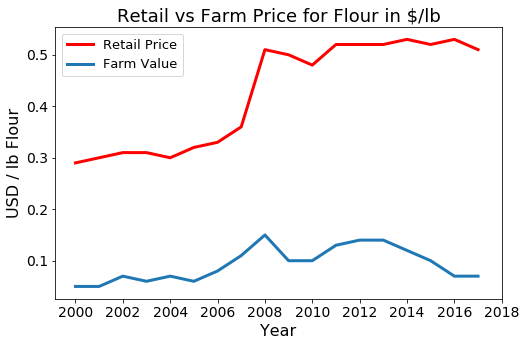

In [0]:
#Plot prices of flour

#Set up figure
fig, ax = plt.subplots(figsize = (8,5))

#Create line plots
ax = sns.lineplot(x = 'Year', y = 'Retail Price', data = df_flour, label = 'Retail Price', color = 'red', linewidth = 3)
ax = sns.lineplot(x = 'Year', y = 'Farm Value', data = df_flour, label = 'Farm Value', linewidth = 3)

#Format ticks
ax.set_xticks(np.arange(2000, 2019, 2))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

#Format axis labels
ax.set_title('Retail vs Farm Price for Flour in $/lb', fontsize = 18)
ax.set_ylabel('USD / lb Flour', fontsize = 16)
ax.set_xlabel('Year', fontsize = 16)

plt.legend(prop = {'size':13})

**It is no suprose that the price recieved by farmers is lower than the retail price. However, it looks as if farmers have been receiving less and less. This could be because the supply chain is becoming more complex. It is critical that companies do not lose sight of the farmers that supply ingredients. Steps must be taken to maintain an open line of communication to farmers to understand their needs.**



---

**It will be more informative to plot the percent of retail value recieved by farmers. Let's go ahead and do that.**

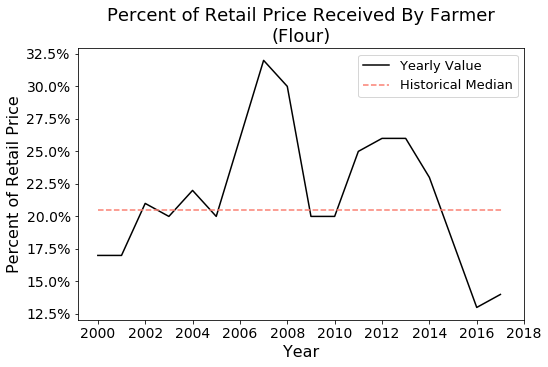

In [4]:
#Plot Farm Share

#Prepare figure
fig, ax = plt.subplots(figsize = (8,5))

#Plot the main components
sns.lineplot(x = 'Year', y = 'Farm Share', data = df_flour, color = 'black', label = 'Yearly Value')
ax.axhline(y = df_flour['Farm Share'].median(), xmin = 0.045, xmax = 0.95, linestyle = "--", color = 'salmon', label = 'Historical Median')

#Fomat ticks
ax.set_xticks(np.arange(2000, 2019, 2))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.yaxis.set_major_formatter(PercentFormatter())

#Format axis labels
ax.set_title('Percent of Retail Price Received By Farmer\n(Flour)', fontsize = 18)
ax.set_ylabel('Percent of Retail Price', fontsize = 16)
ax.set_xlabel('Year', fontsize = 16)

#Size of legend
plt.legend(prop = {'size':13})

# Number of Farms in Each Sales Class

Our goal in this section is to understand how farms in each sales class are doing. We are particularly interested in the proportion of farms in each sales class that vare operating at a gain or at a loss. It should be noted that while sales class is one way to split the data to detect this effect, this does not guarantee that sales class is the sole reason for success and failure of a farm.


---



When discussing the net profit of farms it is important to distinguish between on and off farm profit. This analysis ONLY considers on farm profit. On farm profit includes sales of agricultural goods, government payments, expenses, and farm related income. This resource provided by the USDA can help in understanding the significance of on and off farm income: https://www.ers.usda.gov/topics/farm-economy/farm-sector-income-finances/highlights-from-the-farm-income-forecast/ 


---



The data for this portion of the analysis all comes from USDA NASS Quick Stats: https://quickstats.nass.usda.gov/. I utilize the API feature, but you can also download the data in csv formats. Learn about the API interface here: https://quickstats.nass.usda.gov/api.

In [7]:
#Prepare the payload for the API
api_key = '70D413B2-0123-3524-9634-F730BE441009' 

#Nested payloads for two different queries
payload = {'Number of Ops': {'key':api_key,
	   'source_desc':'CENSUS',
     'sector_desc': 'ECONOMICS',
     'group_desc': 'FARMS & LAND & ASSETS',
	   'commodity_desc':'FARM OPERATIONS',
	   'domain_desc' : 'FARM SALES',
     'short_desc': 'FARM OPERATIONS - NUMBER OF OPERATIONS',
	   'agg_level_desc':'NATIONAL',
	   'year':'2017',
	   'format':'JSON'}, 
           
     'Ops with Loss':{'key':api_key,
	   'source_desc':'CENSUS',
     'sector_desc': 'ECONOMICS',
     'group_desc': 'INCOME',
	   'commodity_desc':'INCOME, NET CASH FARM',
	   'domain_desc' : 'FARM SALES',
     'short_desc': 'INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH LOSS',
	   'agg_level_desc':'NATIONAL',
	   'year':'2017',
	   'format':'JSON'}}

#Empty df to store results
df_all = pd.DataFrame()

#Loop through payloads
for i in payload:

  #Make request
  r = requests.get('http://quickstats.nass.usda.gov/api/api_GET/?key='+api_key, params = payload[i])
  df = pd.read_json(json.dumps(r.json()),orient='split')

  df_all = pd.concat([df_all, df])
  print(i)

#Formatting output. Removing commas, converting to numeric, etc.
df_all['Value'] = df_all['Value'].str.replace(',','')
df_all['Value'] = pd.to_numeric(df_all['Value'])
df_all = df_all[['Value', 'location_desc', 'commodity_desc', 'domaincat_desc', 'unit_desc', 'year']]


#Inspect
df_all.head()

Number of Ops
Ops with Loss


,Value,location_desc,commodity_desc,domaincat_desc,unit_desc,year
0,187949,US TOTAL,FARM OPERATIONS,"FARM SALES: (1,000 TO 2,499 $)",OPERATIONS,2017
1,76865,US TOTAL,FARM OPERATIONS,"FARM SALES: (1,000,000 OR MORE $)",OPERATIONS,2017
2,228218,US TOTAL,FARM OPERATIONS,"FARM SALES: (10,000 TO 24,999 $)",OPERATIONS,2017
3,130932,US TOTAL,FARM OPERATIONS,"FARM SALES: (100,000 TO 249,999 $)",OPERATIONS,2017
4,185341,US TOTAL,FARM OPERATIONS,"FARM SALES: (2,500 TO 4,999 $)",OPERATIONS,2017


**Now we have the data regarding the total number of operations in each sales class and the number of operations in each sales class operating at a loss. All we have to do is merge the two datasets to match up the sales class. Then we can find the proportion of farms in each sales class operating at a loss.**

In [8]:
#Find percentage of farms in each class that are operating at a loss

#Filter the data to the two different categories
df_total_operations = df_all[df_all['commodity_desc'] == 'FARM OPERATIONS']
df_loss_operations = df_all[df_all['commodity_desc'] == 'INCOME, NET CASH FARM']

#Perform the merge on sales class
df = df_total_operations.merge(df_loss_operations, left_on = 'domaincat_desc', right_on = 'domaincat_desc', suffixes = ('_total', '_loss'))

#Basic algebra to find proportion
df['Percentage With Loss'] = (df['Value_loss'] / df['Value_total'])*100
df['Decimal With Loss'] = df['Value_loss'] / df['Value_total']

#Select columns of interest
df = df[['Percentage With Loss', 'Value_total', 'Value_loss', 'year_total', 'domaincat_desc', 'unit_desc_total', 'Decimal With Loss']]

#Use lmbda function to format sales class column text
df['Sales Class'] = df['domaincat_desc'].apply(lambda x: x[x.find("(")+1:x.find(")")])

#Sort the df by percentage with loss
df = df.sort_values(by = 'Percentage With Loss')

#Inspect the df
df.head()

,Percentage With Loss,Value_total,Value_loss,year_total,domaincat_desc,unit_desc_total,Decimal With Loss,Sales Class
1,9.761270,76865,7503,2017,"FARM SALES: (1,000,000 OR MORE $)",OPERATIONS,0.097613,"1,000,000 OR MORE $"
9,13.227551,69703,9220,2017,"FARM SALES: (500,000 TO 999,999 $)",OPERATIONS,0.132276,"500,000 TO 999,999 $"
6,16.693041,87839,14663,2017,"FARM SALES: (250,000 TO 499,999 $)",OPERATIONS,0.166930,"250,000 TO 499,999 $"
3,20.768796,130932,27193,2017,"FARM SALES: (100,000 TO 249,999 $)",OPERATIONS,0.207688,"100,000 TO 249,999 $"
8,26.327511,119434,31444,2017,"FARM SALES: (50,000 TO 99,999 $)",OPERATIONS,0.263275,"50,000 TO 99,999 $"


**We now have the data of interest: percent of farms within each sales class operating at a loss. The next step is to create some visualizations. The first one we can do is a simple bar plot depicting the percecent of farms in each sales class operating at a loss.**

[Text(0, 0, '0%'),
 Text(0, 0, '10%'),
 Text(0, 0, '20%'),
 Text(0, 0, '30%'),
 Text(0, 0, '40%'),
 Text(0, 0, '50%'),
 Text(0, 0, '60%'),
 Text(0, 0, '70%'),
 Text(0, 0, '80%')]

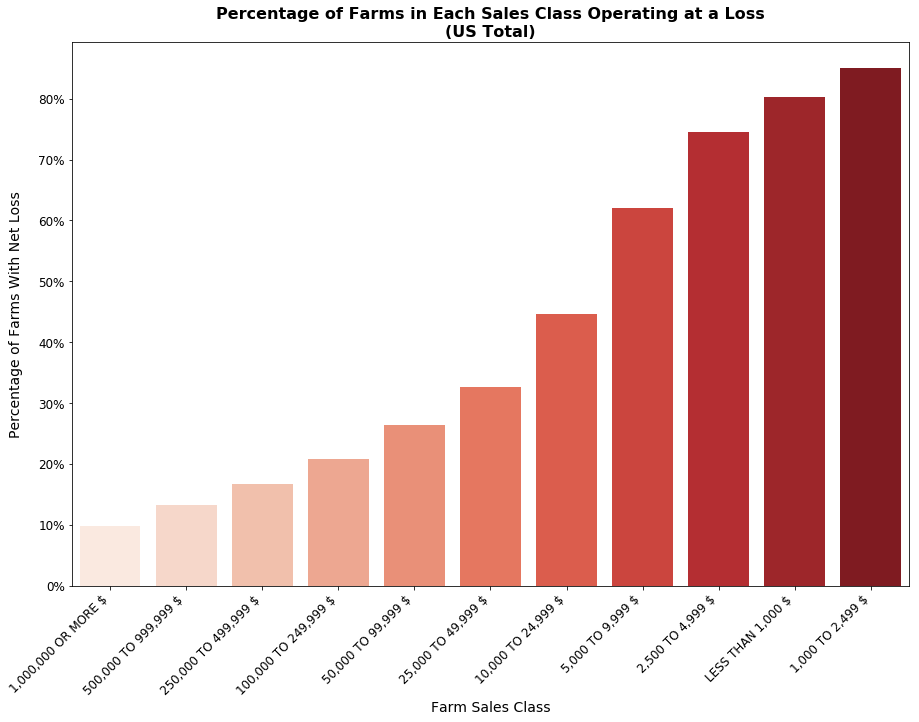

In [9]:
#Prepare figure
fig, ax = plt.subplots(figsize = (15,10))

#Plot barplot
ax = sns.barplot(x= 'Sales Class', y = 'Percentage With Loss', data = df, palette = sns.color_palette('Reds', n_colors = 11))

#Format the axis labels
ax.set_ylabel('Percentage of Farms With Net Loss', fontsize = 14, labelpad = 15)
ax.set_xlabel('Farm Sales Class', fontsize = 14)
ax.set_title('Percentage of Farms in Each Sales Class Operating at a Loss\n(US Total)', fontsize = 16, fontweight = 'bold')

#Format the axis tick labels
ax.set_xticklabels(df['Sales Class'], rotation = 45, ha = 'right', fontsize = 12)
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%'], fontsize = 12)

The above bar plot is good way to visualize some of the basic information. However, it would be insightful to know how many farms are in each sales class as well. One way we can visualize the the number of farms AND the percentage of farms operating at a loss is a treeplot.  Matplotlib and seaborn do not have built in treeplot functions, bu we can use Squarify: https://python-graph-gallery.com/202-treemap-with-colors-mapped-on-values/.

(0.0, 100.0, 0.0, 100.0)

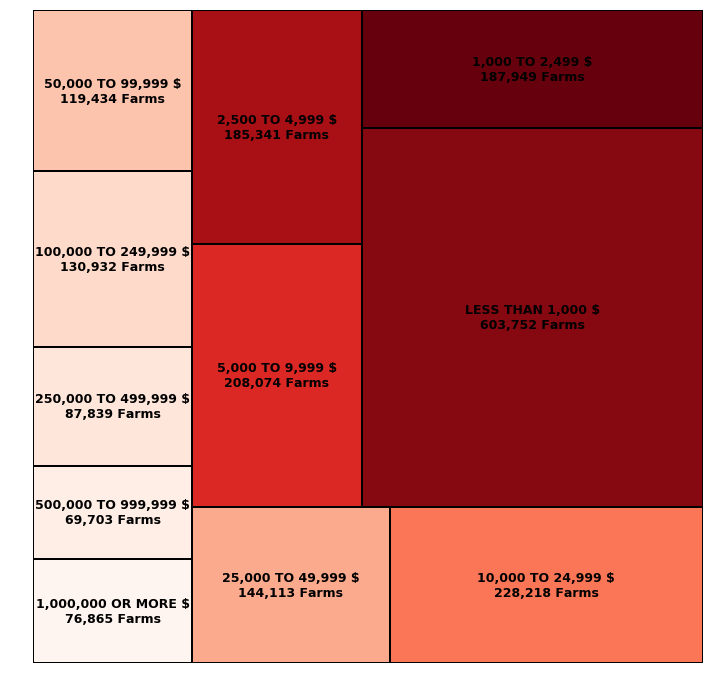

In [21]:
#Install and import squarify
!pip install squarify
import squarify

#Create a color map
cmap = mpl.cm.Reds

#Get min and max values to normalize the color bar
mini = min(df['Percentage With Loss'])
maxi = max(df['Percentage With Loss'])
norm = mpl.colors.Normalize(vmin = mini, vmax = maxi)

#Associate colors with normalize color bar
colors = [cmap(norm(value)) for value in df['Percentage With Loss']]

#Prepare plot
fig, ax = plt.subplots(figsize = (12,12))

#Create labels for each rectangle in treeplot containing the # of farms.
labels = df['Sales Class'].astype('str') + '\n' + df['Value_total'].map('{:,.0f}'.format) + ' Farms'

#Create the treeplot. Format font and linewidth.
ax = squarify.plot(sizes = df['Value_total'], label = labels, color = colors, text_kwargs={'fontsize':12.5, 'fontweight': 'bold'}, bar_kwargs={'linewidth':2, 'edgecolor':'#000000'})

#Hide axis
plt.axis('off')

**We now need to create a color bar for interpretability. Check out the documentation if you have not made a custom colorbar before: https://matplotlib.org/3.1.0/tutorials/colors/colorbar_only.html.**

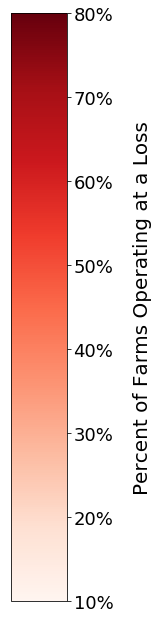

In [20]:
#Prepare figure
fig, ax = plt.subplots(figsize=(1, 12))

#Tune the subplot layout
fig.subplots_adjust(bottom=0.2)

#Select colorbar
cmap = mpl.cm.Reds

#Normalize with min and max values of data. Variables created in previous cell.
norm = mpl.colors.Normalize(vmin=mini, vmax=maxi)

#Create colorbar
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')

#Formatting label
cb1.set_label('Percent of Farms Operating at a Loss', fontsize = 20, labelpad = 20)

#Format ticks
cb1.set_ticks(np.linspace(mini,maxi,8))
cb1.set_ticklabels(['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%'])
cb1.ax.tick_params(labelsize=18)

We can see that the smallest sales class farms are the most abundant and are struggling the most in terms of making a profit. As stated earlier, we cannot draw anything casual from this plot. Using sales class is just one way to detect a signal that there are small farms struggling, but sales may not be the root cause of this struggle. 

That being said, it seems unusual the **80% of farms with \$1,000 to \$2,499 in sales are operating at a loss** in 2017 nationwide. Something must be going on.

If General Mills, or any Consumer Packaged Goods (CPG) company, is interested in turning the tide on the longheld statistic that more than 50% of farmers in the US do not turn a profit then we need to focus on small farms.  

# Government Programs and Farm Sales Class

Government programs surrounding agriculture are very complex. In this section we dive into how subsidies are distributed among various sales class farms. This section is not meant to capture the details of agricultural subsidies, but instead is used to highlight some important features.



---

We will again be using USDA NASS Quick Stats API to access data regarding the amount of subsidies recieved.



---

Note: The treeplot in this section was ultimately removed from the final presentation due to some issues regarding confounding variables which I will explain later.

In [22]:
#Create payload for API
api_key = '70D413B2-0123-3524-9634-F730BE441009' 

payload = {'Number of Ops': {'key':api_key,
	   'source_desc':'CENSUS',
     'sector_desc': 'ECONOMICS',
     'group_desc': 'INCOME',
	   'commodity_desc':'GOVT PROGRAMS',
	   'domain_desc' : 'FARM SALES',
     'short_desc': 'GOVT PROGRAMS, FEDERAL - OPERATIONS WITH RECEIPTS',
	   'agg_level_desc':'STATE',
	   'year':'2017',
	   'format':'JSON'}, 
           
     'Ops with Loss':{'key':api_key,
	   'source_desc':'CENSUS',
     'sector_desc': 'ECONOMICS',
     'group_desc': 'INCOME',
	   'commodity_desc':'GOVT PROGRAMS',
	   'domain_desc' : 'FARM SALES',
     'short_desc': 'GOVT PROGRAMS, FEDERAL - RECEIPTS, MEASURED IN $',
	   'agg_level_desc':'STATE',
	   'year':'2017',
	   'format':'JSON'}}

#States of interest
states = ['MN', 'MT', 'ND', 'SD']

#Empty df to store results
df_all = pd.DataFrame()

#Cycle through the states
for i in payload:
  for s in states:
    payload[i]['state_alpha'] = s
  
    #Make request
    r = requests.get('http://quickstats.nass.usda.gov/api/api_GET/?key='+api_key, params = payload[i])
    df = pd.read_json(json.dumps(r.json()),orient='split')

    df_all = pd.concat([df_all, df])
    print(s)

#Format final output. Removing commas, changing data types, etc.
df_all['Value'] = df_all['Value'].str.replace(',','')
df_all['Value'] = pd.to_numeric(df_all['Value'])
df_all = df_all[['Value', 'location_desc', 'commodity_desc', 'domaincat_desc', 'unit_desc', 'year']]

#Inspect
df_all.head()

MN
MT
ND
SD
MN
MT
ND
SD


,Value,location_desc,commodity_desc,domaincat_desc,unit_desc,year
0,557,MINNESOTA,GOVT PROGRAMS,"FARM SALES: (1,000 TO 2,499 $)",OPERATIONS,2017
1,3674,MINNESOTA,GOVT PROGRAMS,"FARM SALES: (1,000,000 OR MORE $)",OPERATIONS,2017
2,2226,MINNESOTA,GOVT PROGRAMS,"FARM SALES: (10,000 TO 24,999 $)",OPERATIONS,2017
3,6034,MINNESOTA,GOVT PROGRAMS,"FARM SALES: (100,000 TO 249,999 $)",OPERATIONS,2017
4,754,MINNESOTA,GOVT PROGRAMS,"FARM SALES: (2,500 TO 4,999 $)",OPERATIONS,2017


In [23]:
#Create dictionary that contains state name, sales class, payment per farm, and number of farms

state_dict = {}

#Cycle through states
for state in df_all['location_desc'].unique():
  df_state = df_all[df_all['location_desc'] == state]
  
  #Cycle though sales class
  for sales_class in df_all['domaincat_desc'].unique():
    df_state_class = df_state[df_state['domaincat_desc'] == sales_class]
    
    total_ops = df_state_class[df_state_class['unit_desc'] == 'OPERATIONS']['Value'].values[0]
    total_payment = df_state_class[df_state_class['unit_desc'] == '$']['Value'].values[0]
    
    #Keys are tuples for multindex
    state_dict[(state, sales_class)] = [total_payment / total_ops, total_ops]
    
  print(state)    

MINNESOTA
MONTANA
NORTH DAKOTA
SOUTH DAKOTA


In [24]:
#Convert dictionary to dataframe

#Tranpose the new df and undo the multiindex
df_govt_payments = pd.DataFrame.from_dict(state_dict).transpose().reset_index()

#Rename columns
df_govt_payments = df_govt_payments.rename(columns = {'level_0':'State', 'level_1':'Sales Class', 0:'Payment per Operation', 1:'Number of Operations'})

#Add formatted Sales Class column
df_govt_payments['Sales Class Abr'] = df_govt_payments['Sales Class'].apply(lambda x: x[x.find("(")+1:x.find(")")])

#Inspect
df_govt_payments.head()

,State,Sales Class,Payment per Operation,Number of Operations,Sales Class Abr
0,MINNESOTA,"FARM SALES: (1,000 TO 2,499 $)",4066.427289,557.0,"1,000 TO 2,499 $"
1,MINNESOTA,"FARM SALES: (1,000,000 OR MORE $)",27872.618400,3674.0,"1,000,000 OR MORE $"
2,MINNESOTA,"FARM SALES: (10,000 TO 24,999 $)",3948.337826,2226.0,"10,000 TO 24,999 $"
3,MINNESOTA,"FARM SALES: (100,000 TO 249,999 $)",6905.203845,6034.0,"100,000 TO 249,999 $"
4,MINNESOTA,"FARM SALES: (2,500 TO 4,999 $)",4566.312997,754.0,"2,500 TO 4,999 $"


**We now have data regarding the sales class, payment per operation, and the number of operations. We can construct a treeplot simmilar to what we created for farm sales class and ability to turn a profit.**

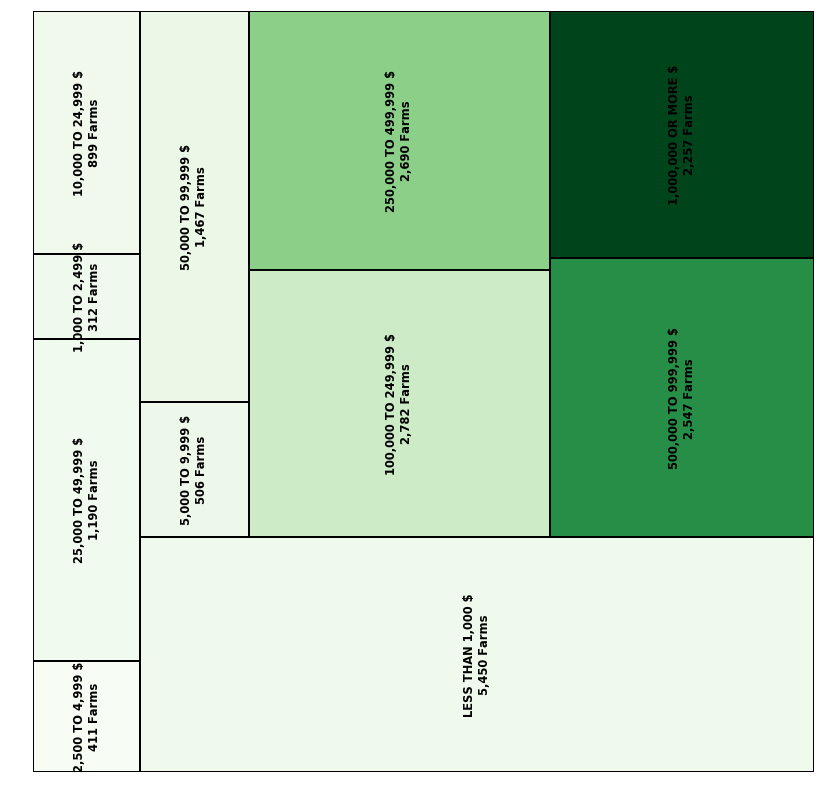

In [0]:
#Filter to North Dakota and sort values by payment per operation.
df_govt_payments_MT = df_govt_payments[df_govt_payments['State'] == 'NORTH DAKOTA'].sort_values(by = 'Payment per Operation')

#Normalize colors
cmap = matplotlib.cm.Greens
mini = min(df_govt_payments_MT['Payment per Operation'])
maxi = max(df_govt_payments_MT['Payment per Operation'])
norm = matplotlib.colors.Normalize(vmin = mini, vmax = maxi)
colors = [cmap(norm(value)) for value in df_govt_payments_MT['Payment per Operation']]

#Prepare plot
fig, ax = plt.subplots(figsize = (14,14))

#Create labels for each rectangle containing the number of farms in each sales class
labels = df_govt_payments_MT['Sales Class Abr'].astype('str') + '\n' + df_govt_payments_MT['Number of Operations'].map('{:,.0f}'.format) + ' Farms'

#Create the treeplot
ax = squarify.plot(sizes = df_govt_payments_MT['Number of Operations'], label = labels, color = colors, text_kwargs={'fontsize':11.5, 'fontweight': 'bold', 'rotation':90}, bar_kwargs={'linewidth':2, 'edgecolor':'#000000'})
plt.axis('off')

**The next step is to create a color bar for interpretability.**

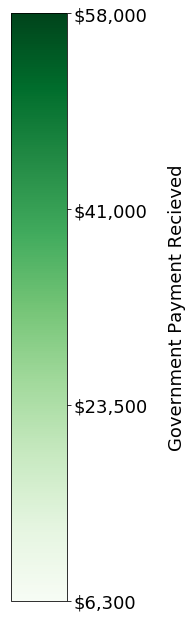

In [0]:
#Prepare plot
fig, ax = plt.subplots(figsize=(1, 12))
fig.subplots_adjust(bottom=0.2)

#Select color scheme and normalize
cmap = mpl.cm.Greens
norm = mpl.colors.Normalize(vmin=mini, vmax=maxi)

#Create the color bar
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')

#Format the labels and ticks
cb1.set_label('Government Payment Recieved', fontsize = 18, labelpad = 20)
cb1.set_ticks(np.linspace(mini,maxi,4))
cb1.set_ticklabels(['$6,300', '$23,500', '$41,000', '$58,000'])
cb1.ax.tick_params(labelsize=18)

**The above treeplot was ultimately not included in my final presentation. The choice of information lead to too many questions regarding confounding variables. The aim was to depict the distribution of subsidy payments. However many people posed a valid question: shouldn't the largest farms be getting the most subsidies because they are growing the most crops and need the most safety incase of failure? In other words, there are too many confounding variables to make any useful claims.**

**I found that it was more impactful to look at the type of crops that are subsidized. I decided to focus on North Dakota as this is one fo the many states General Mills sources its grains from. My hope is to expose that there are mainstream crops that are subsidized (corn, soy, wheat, crops for oils, etc) and that other, more diverse, crops like perennials and legumes are not subsidized.**

**For this section of my analysis I obtained  my data from the Environmental Working Group Farm Subsidy Database: https://farm.ewg.org/index.php. You can either copy and paste the data from the tables and save as csv files ae you can (politely) scrape their data.**

In [43]:
#Select the page of interest. Copy the url.
url = 'https://farm.ewg.org/region.php?fips=38000&progcode=total&yr=2017'

#The EWG website has has some protection for scraping data.
#We can pretend we are a web browser to bypass this.
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"}

#Make the request
r = requests.get(url, headers=header)

#Parse the html using pandas read_html.
dfs = pd.read_html(r.text)

#Select the df of interest
ND_subs = dfs[0]

#Format the columns. Remove dollar signs, commas, convert to int
ND_subs['Subsidy Total'] = ND_subs['Subsidy Total'].str.replace('$','')
ND_subs['Subsidy Total'] = ND_subs['Subsidy Total'].str.replace(',','')
ND_subs['Subsidy Total'] = ND_subs['Subsidy Total'].astype(int)
ND_subs['Program'] = ND_subs['Program'].str.replace(pat = 'Subsidies', repl = ' ')

#Inspect the df
ND_subs.head()

,Rank,Program,Number of Recipients,Subsidy Total
0,1,Wheat,21619,413452124
1,2,Soybean,637,198482579
2,3,Corn,4084,168860920
3,4,Canola,6963,101209267
4,5,Conservation Reserve Program,14546,76021076


**In the above cell you can easily change the url to obtain data for other states and years. Please scrape responsibly. The next step is to make a simple barplot showing the amount of money dedicated to each program in 2017 in North Dakota.**

Text(0.5, 1.0, 'Government Payments By Program\nNorth Dakota (2017)')

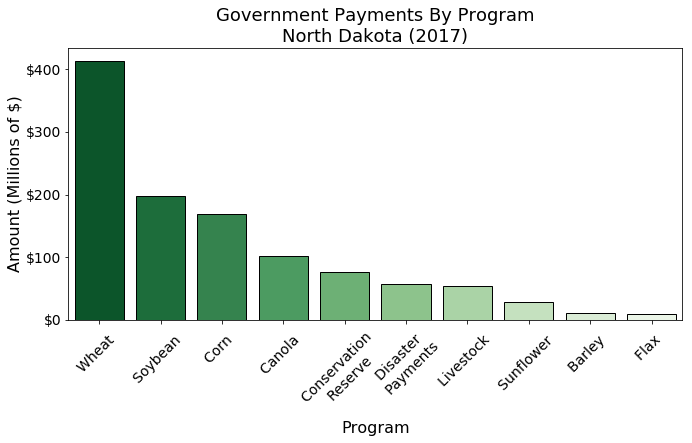

In [45]:
#Bar plot of types of subsidies in North Dakota

#Prepare figure
fig, ax = plt.subplots(figsize=(11,5))

#Plot the barpot
ax = sns.barplot(x = 'Program', y = 'Subsidy Total', data = ND_subs, palette = 'Greens_r', edgecolor = 'black')
plt.ticklabel_format(style='plain', axis='y')

#Handle tick formatting
ax.set_yticks(np.linspace(0,400000000,5))
ax.set_yticklabels(['$0', '$100', '$200', '$300', '$400'], fontsize = 14)

#Collect labels so can modify individual ones
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[4] = 'Conservation \nReserve'
labels[5] = 'Disaster \nPayments'
ax.set_xticklabels(labels, fontsize = 14)

#Rotate x tick labels for clarity
plt.xticks(rotation = 45)

#Format labels
ax.set_ylabel('Amount (Millions of $)', fontsize = 16)
ax.set_xlabel('Program', fontsize = 16)
ax.set_title('Government Payments By Program\nNorth Dakota (2017)', fontsize = 18)

**We can see that wheat recieves the most money for subsidies. It should be noted that the relative amounts of subsidies in this graphic also relfect rhe relative amount of acres. The point of this grpahic is not to show that wheat is oversubsidized compared to corn or any of the programs listed. The point is to recognize that not all crops recieve subsidies.**

**Growing a crop that is not covered by government subsidies is risky. Subsidies discourage farmers from innovating, diversifying their land use, and taking other actions needed to prosper in the competitive economy. Farmers that grow crops that are not subsidized like many perennial plants are at a distinct economic disadvantage.**

# Concentration of Commodity Subsidies

Even if a farmer decides to grow heavily subsidized crops for enhanced financial security, there is still a low chance of recieving a subsidy of any meaningful amount. Commodity subsidies, such as those handed out for corn, soy, and wheat, are heavily concentrated in handfull of recipients. The Environmental Working Group keeps an excellent database containing this information: https://farm.ewg.org/progdetail.php?fips=00000&progcode=totalfarm&page=conc&regionname=theUnitedStates 

The goal of this section to understand just how concentrated these commodity subsidies are with compelling visuals.

**The first step is to obtain the farm concentration data. We will again scrape the Environmental Working Group subsidy database. Please scrape responsibly.**

In [77]:
#Select the page of interest. Copy the url.
url = 'https://farm.ewg.org/progdetail.php?fips=38000&progcode=totalfarm&page=conc&regionname=NorthDakota'

#The EWG website has has some protection for scraping data.
#We can pretend we are a web browser to bypass this.
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"}

#Make the request
r = requests.get(url, headers=header)

#Parse the html using pandas read_html.
dfs = pd.read_html(r.text)

#Select the df of interest
df = dfs[0]

df = df.rename(columns = {df.columns[3]:'Total Payments (1995 - 2019)'})

cols = ['Total Payments (1995 - 2019)', 'Payment per Recipient']

#Format the columns. Remove dollar signs, commas, convert to int
for c in cols:
  df[c] = df[c].str.replace('$','')
  df[c] = df[c].str.replace(',','')
  df[c] = df[c].astype(int)

#Make a numeric column for percent of payments
df['Pct. of Payments Numeric'] = np.round(df['Total Payments (1995 - 2019)']/(df.iloc[20,3] + df.iloc[19,3]),2)
ND_subs_conc = df

#Inspect the df
ND_subs_conc.head()

,Pct. of Recipients,Pct. of Payments,Number of Recipients,Total Payments (1995 - 2019),Payment per Recipient,Pct. of Payments Numeric
0,Top 1%,14%,780,1173987995,1505113,0.14
1,Top 2%,23%,1561,1969715296,1261829,0.23
2,Top 3%,31%,2341,2634529186,1125386,0.31
3,Top 4%,38%,3122,3207572560,1027410,0.38
4,Top 5%,44%,3903,3711202012,950859,0.44


**The next step is to construct a barplot showing the total payments for each percentile of recipients.**

Text(0.5, 0, '')

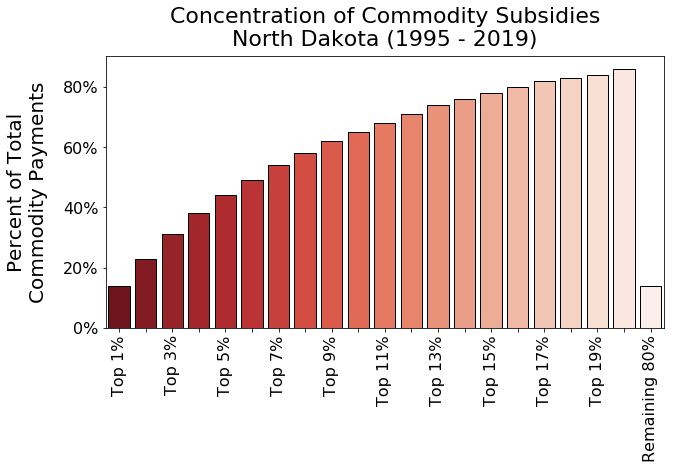

In [78]:
#Create figure
fig, ax = plt.subplots(figsize = (10,5))

#Plot barplot
ax = sns.barplot(x = 'Pct. of Recipients', y = 'Pct. of Payments Numeric', data = ND_subs_conc, palette = 'Reds_r', edgecolor = 'black')

#Modify axis labels
ax.set_title('Concentration of Commodity Subsidies\nNorth Dakota (1995 - 2019)', fontsize = 22, pad = 10)
ax.set_ylabel('Percent of Total\nCommodity Payments', fontsize = 20, labelpad = 15)

#Lazy xtick formatting
xlabels = ['Top 1%', '', 'Top 3%', '', 'Top 5%', '', 'Top 7%', '', 'Top 9%', '', 'Top 11%', '',
           'Top 13%', '', 'Top 15%', '', 'Top 17%', '', 'Top 19%', '', 'Remaining 80%']
ax.set_xticklabels(xlabels, rotation = 90, fontsize = 16)           

#Modify y tick labels
ylabels = ['0%', '20%', '40%', '60%', '80%']
ax.set_yticklabels(ylabels, fontsize = 16)

#Modify x axis label
ax.set_xlabel('')

**We can see that the commodity payments, as expected, are highly concentrated in a few individuals. The bottom 80% recieves nearly the same amount as the top 1% of recipients. The bottom 80% represents many more people than the top 1%. This illustrates the point that even farmers who decide to grow mainstream crops may not be able to recieve any sizeable subsidies given the high concentration of payments.**

**Next we can plot the payout per recipient in each percentile.**

Text(0.5, 0, '')

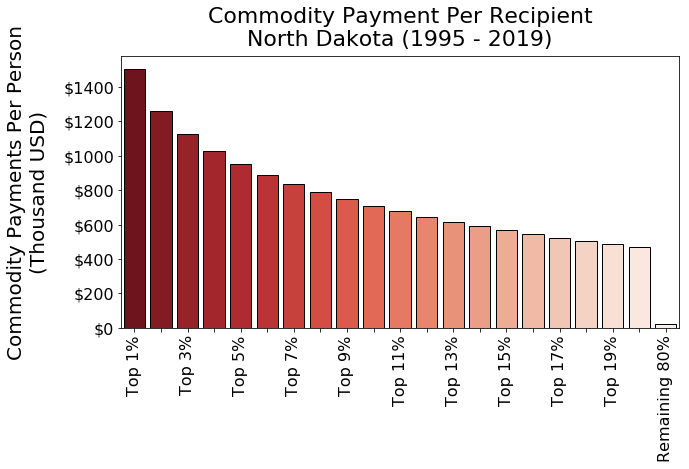

In [79]:
#Create figure
fig, ax = plt.subplots(figsize = (10,5))

#Plot barplot
ax = sns.barplot(x = 'Pct. of Recipients', y = 'Payment per Recipient', data = df, palette = 'Reds_r', edgecolor = 'black')

#Modify axis labels
ax.set_title('Commodity Payment Per Recipient\nNorth Dakota (1995 - 2019)', fontsize = 22, pad = 10)
ax.set_ylabel('Commodity Payments Per Person\n(Thousand USD)', fontsize = 20, labelpad = 15)

#Lazy xtick formatting
xlabels = ['Top 1%', '', 'Top 3%', '', 'Top 5%', '', 'Top 7%', '', 'Top 9%', '', 'Top 11%', '',
           'Top 13%', '', 'Top 15%', '', 'Top 17%', '', 'Top 19%', '', 'Remaining 80%']
ax.set_xticklabels(xlabels, rotation = 90, fontsize = 16)     

#Modify y tick labels
ylabels = ['$0', '$200', '$400', '$600', '$800', '$1000', '$1200', '$1400']
ax.set_yticklabels(ylabels, fontsize = 16)

#Modify x axis label
ax.set_xlabel('')

**The difference in payment per recipient per person is massive. Note that this SHOULD NOT be interpreted as a payment recieved per person as the payouts are cumlative from 1995 to 2019.**

# Conclusions

**In conclusion, there are many different variables that contribute to the bleak economic landscape of farming. It is diffiuclt to isolate the effect of one variable due to so many confounding factors. Regardless, some combination of complex supply chains, the financial struggles of small farms, and the unequal distribution of subsidies among crops and recipients are affecting the financial landscape of farming in the US.**